### Student Information
Name: 何若彤

Student ID: 112096029

GitHub ID: Althea80

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

### 1.Test code for environment setup

In [22]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
from sklearn.utils import Bunch
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')
%load_ext autoreload
%autoreload 2
import sys
print(sys.executable) # c:\<your path to the project directory>\.venv\Scripts\python.exe
print(sys.version)


/Users/hello/Desktop/資料探勘/DM2025Labs/DM2025-Lab1-Exercise/.venv/bin/python
3.11.0 (main, Oct  4 2025, 16:38:25) [Clang 17.0.0 (clang-1700.0.13.5)]


### 2. Data Preparation

In order to get faster execution times (similar to working with 4 categories 
out of the 20 available in the newsgroups dataset), we can select specific 
sentiment categories out of the 3 available:

Available categories:
  - 'positive' (label: 1.0)
  - 'neutral'  (label: 0.0)
  - 'negative' (label: -1.0)

In [23]:
df_raw = pd.read_csv('~/Desktop/資料探勘/DM2025Labs/DM2025-Lab1-Exercise/newdataset/Reddit-stock-sentiment.csv')
df_raw['category_name'] = df_raw['sentiment'].map({
    1.0: 'positive',
    0.0: 'neutral',
    -1.0: 'negative'
})
categories = ['positive', 'neutral', 'negative']

In [24]:
def fetch_reddit_sentiment(df_raw,
                           subset='train',
                           categories=None,
                           shuffle=True,
                           random_state=42):
    
    if categories is None:
        categories = ['positive', 'neutral', 'negative']
    
    df_filtered = df_raw[df_raw['category_name'].isin(categories)].copy()
    
    if shuffle:
        df_filtered = df_filtered.sample(frac=1, random_state=random_state)
    
    df_filtered = df_filtered.reset_index(drop=True)
    
    category_to_idx = {cat: idx for idx, cat in enumerate(categories)}
    target = df_filtered['category_name'].map(category_to_idx).values
    
    bunch = Bunch(
        data=df_filtered['text'].tolist(),
        target=target,
        target_names=categories,
        filenames=[f"reddit_{row['post_id']}.txt" for _, row in df_filtered.iterrows()],
        metadata=df_filtered[['type', 'datetime', 'post_id', 'subreddit', 'title', 
                              'author', 'upvotes', 'downvotes', 'upvote_ratio',
                              'subjectivity', 'polarity']].to_dict('records'),
        DESCR=f'Reddit Stock Sentiment Dataset\nCategories: {categories}\nTotal samples: {len(df_filtered)}'
    )
    return bunch

In [25]:
twenty_train = fetch_reddit_sentiment(
    df_raw,
    subset='train',
    categories=categories,
    shuffle=True,
    random_state=42
)

### >>> Exercise 1 
I built a similar dictionary structure to replicate the original lab's functionality.
Since we're working with a CSV file instead of sklearn's built-in dataset,
I generate all the attributes (data, target, target_names, etc.) separately
to create a Bunch object that mimics fetch_20newsgroups().

In [26]:
for i in range(3):
    meta = twenty_train.metadata[i]
    category = twenty_train.target_names[twenty_train.target[i]]
    
    print(f'Example {i+1}')
    print(f"From: r/{meta['subreddit']} by u/{meta['author']}")
    print(f"Subject: {meta['title']}")
    print(f"Date: {meta['datetime']}")
    print(f"Post-ID: {meta['post_id']}")
    print(f"Type: {meta['type']}")
    print(f"Upvotes: {meta['upvotes']} | Downvotes: {meta['downvotes']} | Ratio: {meta['upvote_ratio']}")
    print(f"Sentiment: {category}")
    print(f"Polarity: {meta['polarity']:.3f} | Subjectivity: {meta['subjectivity']:.3f}")
    print()
    print("\n".join(twenty_train.data[i].split("\n")))
    print("=" * 80)
    print()

Example 1
From: r/StockMarket by u/IamNotaMonkeyRobot
Subject: Trump: We Are Doing Really Well On Our Tariff Policy.
Date: 2025-04-11 15:42:58
Post-ID: mmkwda9
Type: comment
Upvotes: 1 | Downvotes: nan | Ratio: nan
Sentiment: neutral
Polarity: 0.000 | Subjectivity: 0.000

"We" who?

Example 2
From: r/wallstreetbets by u/iPlayedHockeInHS
Subject: Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
Date: 2025-04-12 3:04:05
Post-ID: mmob98a
Type: comment
Upvotes: 1 | Downvotes: nan | Ratio: nan
Sentiment: negative
Polarity: -0.600 | Subjectivity: 0.950

Chicken jockey

Example 3
From: r/StockMarket by u/Narradisall
Subject: How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
Date: 2025-04-10 14:40:26
Post-ID: mme8wxn
Type: comment
Upvotes: 2 | Downvotes: nan | Ratio: nan
Sentiment: positive
Polarity: 0.800 | Subjectivity: 0.750

Not great Bob



### 3. Data Transformation

In [27]:
import pandas as pd

import helpers.data_mining_helpers as dmh

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))


### **>>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes.

In [28]:
print(X.query('category_name == "positive"')[["text","category_name"]])
print(X[X['text'].str.contains('money', case=False, na=False)])

                                                  text category_name
2                                        Not great Bob      positive
3    Speak for yourself, my wife is being harder on...      positive
6                          200k loss in a month.. haha      positive
7    High risk high beta portfolio but it's 50% uni...      positive
11   Other countries probably will go through a rec...      positive
..                                                 ...           ...
833  You need to stop listening to the noise and th...      positive
834  That was a masterfully executed bull trap. Let...      positive
835  Hey guys! Currently on vacation which has been...      positive
842                                   My first thought      positive
846  My personal favorite part of the graph is that...      positive

[319 rows x 2 columns]
                                                  text  category category_name
10   Go with the flow if you wanna make money..for ...         2     

In [29]:
X.iloc[:10, 0]

0                                            "We" who?
1                                       Chicken jockey
2                                        Not great Bob
3    Speak for yourself, my wife is being harder on...
4                               Where can I read this?
5                         That's a chart since April 6
6                          200k loss in a month.. haha
7    High risk high beta portfolio but it's 50% uni...
8                                                FELON
9    That’s an 11% drop, even with the delusional s...
Name: text, dtype: object

In [30]:
X[X.index.isin([2, 4, 6])]

,text,category,category_name
2,Not great Bob,0,positive
4,Where can I read this?,1,neutral
6,200k loss in a month.. haha,0,positive


### **>>> Exercise 3 :**  
Try to fetch records belonging to the ```positive``` category, and query every 10th record. Only show the first 5 records.

In [31]:
X[X["category_name"]=="positive"][:10][0:5]

,text,category,category_name
2,Not great Bob,0,positive
3,"Speak for yourself, my wife is being harder on...",0,positive
6,200k loss in a month.. haha,0,positive
7,High risk high beta portfolio but it's 50% uni...,0,positive
11,Other countries probably will go through a rec...,0,positive


### 4. Data Mining using Pandas

### >>> Exercise 4 : 
I have calculated the missing values in every record instead of every column.  

In [32]:
X.isnull().apply(lambda x: dmh.check_missing_values(x),axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [33]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "category"])

In [34]:
dummy_series

text        dummy_record
category               1
dtype: object

In [35]:
dummy_series.to_frame().T

,text,category
0,dummy_record,1


In [36]:
result_with_series = pd.concat([X, dummy_series.to_frame().T], ignore_index=True)

In [37]:
# check if the records was commited into result
len(result_with_series)

848

In [38]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,1


In [39]:
dummy_dict = [{'text': 'dummy_record',
               'category': 1
              }]

In [40]:
X = pd.concat([X, pd.DataFrame(dummy_dict)], ignore_index=True)

In [41]:
X.dropna(inplace=True)
X.isnull().apply(lambda x: dmh.check_missing_values(x))

,text,category,category_name
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


### 4.2 Dealing with Duplicate Data

In [42]:
dummy_duplicate_dict = [{
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        },
                        {
                             'text': 'dummy record',
                             'category': 1, 
                             'category_name': "dummy category"
                        }]

In [43]:
X = pd.concat([X, pd.DataFrame(dummy_duplicate_dict)], ignore_index=True)
X.drop_duplicates(keep=False, inplace=True)

## 5.  Data Preprocessing

### 5.1 Sampling

In [44]:
X_sample = X.sample(n=100)
X_sample[0:4]

,text,category,category_name
533,100% fact! Truth hurts.,1,neutral
701,"Recent strong stock performance, with capital ...",0,positive
142,What site can you even purchase this stock ?,1,neutral
137,28-3 vibes,1,neutral


### >>> Exercise 7 :
The bar chart shows the distribution of sentiment categories in the sample dataset(n=100). 
The three categories (positive, neutral, and negative) are relatively balanced, 
with positive sentiment having slightly more samples (approximately 36), 
followed by neutral (approximately 33) and negative (approximately 31).

<Axes: title={'center': 'Category distribution'}, xlabel='category_name'>

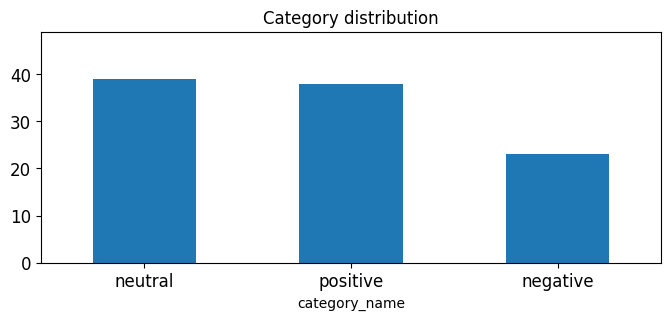

In [45]:
# Answer here
X_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, X_sample.category_name.value_counts().max()+10], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

### >>> Exercise 8 :
In the side-by-side comparison of the distribution between the two datasets shows that there still difference between the distribution of full dataset and sample dataset.

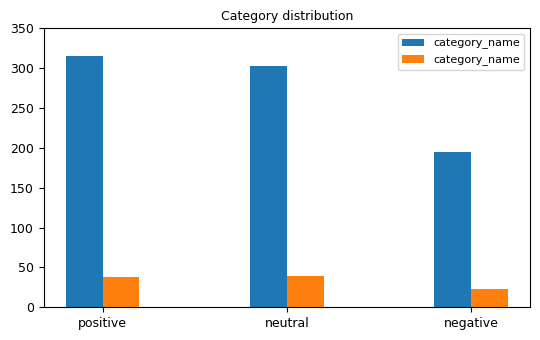

In [46]:
x_counts = X.category_name.value_counts()
x_sample_counts = X_sample.category_name.value_counts()
categories = sorted(set(x_counts.index).union(set(x_sample_counts.index)),reverse=True)
x_counts = x_counts.reindex(categories, fill_value=0)
x_sample_counts = x_sample_counts.reindex(categories, fill_value=0)
bar_width = 0.2
x1 = np.arange(len(categories)) 
x2 = [x + bar_width for x in x1] 
plt.figure(figsize=(5.5, 3.5))
plt.bar(x1, x_counts, bar_width, label='category_name')
plt.bar(x2, x_sample_counts, bar_width, label='category_name')
plt.title('Category distribution',fontsize = 9)
plt.ylim([0, 350])
plt.xticks(x1 + bar_width/2, categories,fontsize = 9)
plt.yticks(fontsize=9)
plt.legend(fontsize = 8)
plt.tight_layout()
plt.show()

### 5.2 Feature Creation

In [47]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))
list(X[0:1]['unigrams'])

[nltk_data] Downloading package punkt to /Users/hello/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/hello/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[['``', 'We', "''", 'who', '?']]

### 5.3 Feature subset selection

In [48]:
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) 
analyze = count_vect.build_analyzer()

### >>> Exercise 9
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [49]:
analyze(X.text[0])

['we', 'who']

In [50]:
X_counts.shape

(813, 4313)

In [51]:
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '01378', '02', '027', '03', '06', '08', '10', '100'],
      dtype=object)

In [52]:
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [53]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

### >>> Exercise 10 :
The code uses sparse matrix operations (.nonzero()) to efficiently find 
non-zero indices, then filters for count = 1. Results show four 
single-occurrence terms: 'where' (index 4196), 'can' (694), 'read' (3086), 
and 'this' (3835).

In [54]:
record_index = 4

non_zero_indices = X_counts[record_index].nonzero()[1]
feature_names = count_vect.get_feature_names_out()

for idx in non_zero_indices:
    if X_counts[record_index, idx] == 1:
        print(f"{idx}: '{feature_names[idx]}'")

4196: 'where'
694: 'can'
3086: 'read'
3835: 'this'


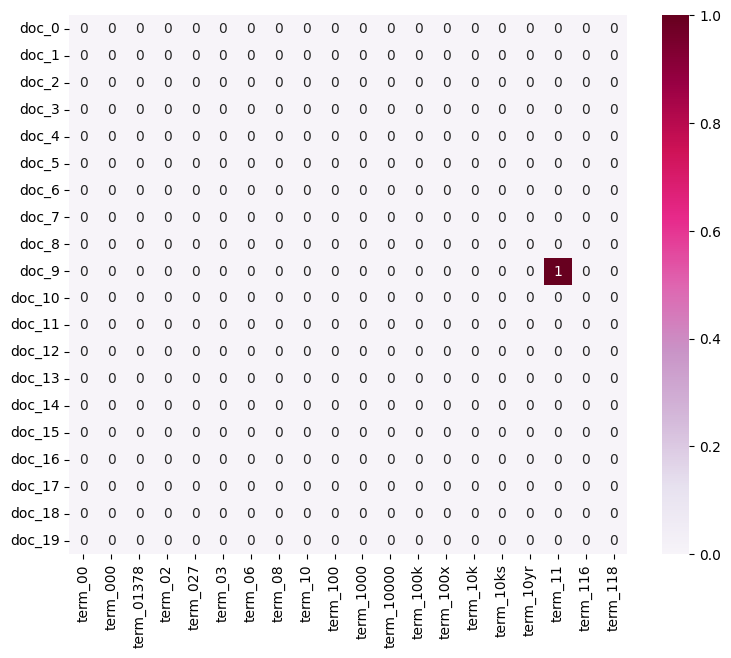

In [55]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:20].toarray()
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True) 

### 5.4 Attribute Transformation / Aggregation

###  5.4.1 Transform Text Data

In [56]:
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

### >>> Exercise 12
interactive visualization of subplots

In [57]:
import plotly.graph_objects as plotly
fig = plotly.Figure(data=[
    plotly.Bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
])
fig.update_layout(
    title='Term Frequencies: First 300 Terms',
    xaxis_title='Terms',
    yaxis_title='Frequency',
    xaxis_tickangle=-90,  
    height=600,
    template='plotly_white')
fig.show()

### >>> Exercise 13
I reduced the number of terms by using stratified sample with Terms from Each Frequency Quartile.

In [58]:
q1, q2, q3 = np.percentile(term_frequencies, [25, 50, 75])


sample_terms = []
sample_freqs = []
sample_labels = []

quartiles = [
    (0, q1, 'Q1: Low Freq'),
    (q1, q2, 'Q2: Medium-Low Freq'),
    (q2, q3, 'Q3: Medium-High Freq'),
    (q3, np.inf, 'Q4: High Freq')
]

for lower, upper, label in quartiles:
    mask = (term_frequencies >= lower) & (term_frequencies < upper)
    candidates_idx = np.where(mask)[0]
    
    if len(candidates_idx) > 0:
        n_sample = min(5, len(candidates_idx))
        sampled_idx = np.random.choice(candidates_idx, n_sample, replace=False)
        sample_terms.extend(feature_names[sampled_idx])
        sample_freqs.extend(term_frequencies[sampled_idx])
        sample_labels.extend([label] * n_sample)
fig = plotly.Figure()
for quartile_label in ['Q1: Low Freq', 'Q2: Medium-Low Freq', 
                       'Q3: Medium-High Freq', 'Q4: High Freq']:
    mask = [label == quartile_label for label in sample_labels]
    q_terms = [term for term, m in zip(sample_terms, mask) if m]
    q_freqs = [freq for freq, m in zip(sample_freqs, mask) if m]

    fig.add_trace(plotly.Bar(
        x=q_freqs,          
        y=q_terms,           
        name=quartile_label,
        orientation='h',
        hovertemplate='<b>%{y}</b><br>Frequency: %{x:,}<extra></extra>'
    ))

fig.update_layout(
    title='Stratified Sample: Terms from Each Frequency Quartile',
    xaxis_title='Frequency',
    yaxis_title='Terms',
    height=800,
    barmode='overlay',
    template='plotly_white'
)

fig.show()

### >>> Exercise 14 :
Due to the number of dataset, I only chose 100 terms as sample to drow the long tail and found that the prep. or beV were most used in the data.

In [59]:
sorted_indices = np.argsort(term_frequencies)[::-1]
sorted_terms = feature_names[sorted_indices]
sorted_freqs = term_frequencies[sorted_indices]

fig = plotly.Figure(data=[
    plotly.Bar(
        x=list(range(100)), 
        y=sorted_freqs[:100],
        text=sorted_terms[:100],
        hovertemplate='<b>Rank %{x}</b><br>%{text}<br>Frequency: %{y:,}<extra></extra>'
    )
])

fig.update_layout(
    title='Long Tail Distribution',
    xaxis_title='Term Rank (1 = Most Frequent)',
    yaxis_title='Frequency'
)

fig.show()

### >>> Exercise 15 :
I use'term_frequencies_log' with sample=100 to view the gap between different frenquency of terms clearly.

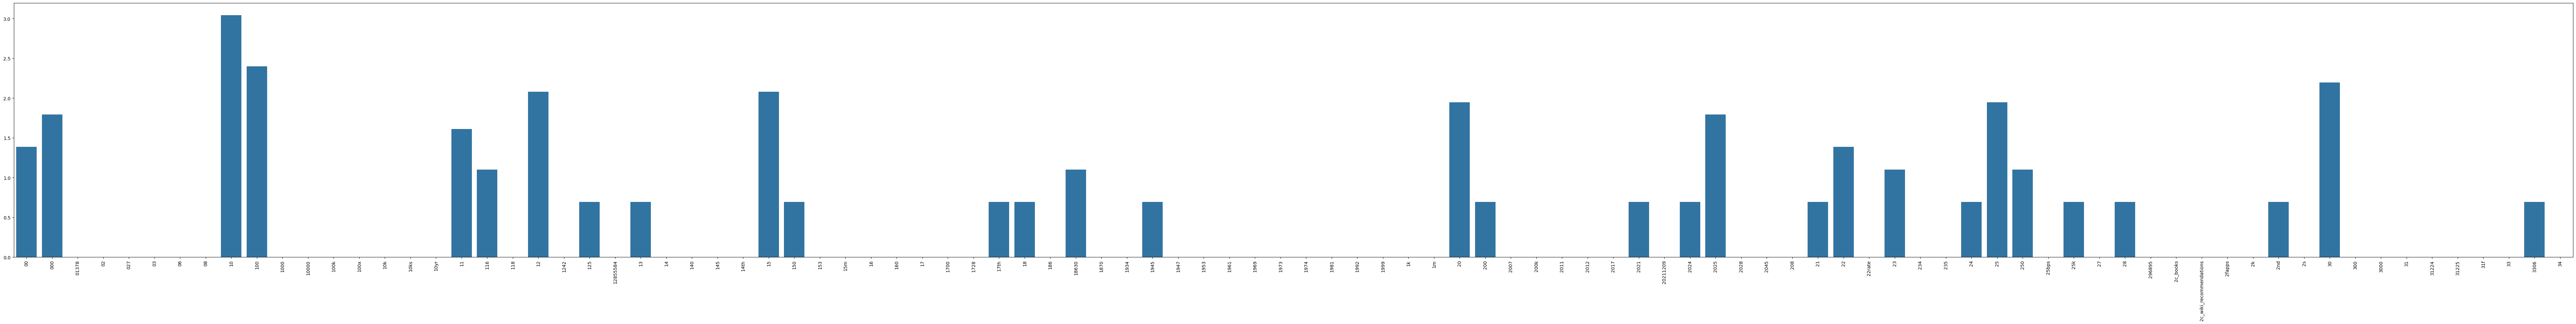

In [60]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:100],
                y=term_frequencies_log[:100])
g.set_xticklabels(count_vect.get_feature_names_out()[:100], rotation = 90);

I chose horizontal bar charts to visualize the top 10 most frequent words in each sentiment category. Using CountVectorizer, I extracted word frequencies after removing stop words and common uninformative terms to reveal real differences between sentiments. The visualization shows distinct vocabulary patterns: positive sentiment features "china," "good," and "company" (suggesting business optimism), negative sentiment includes "tariffs" and "bad" (indicating political/economic frustration), while neutral sentiment contains technical terms like "emote" and "img." I kept cross-category words like "trump" and "china" as they provide valuable context about central discussion topics that generate varying emotional responses.

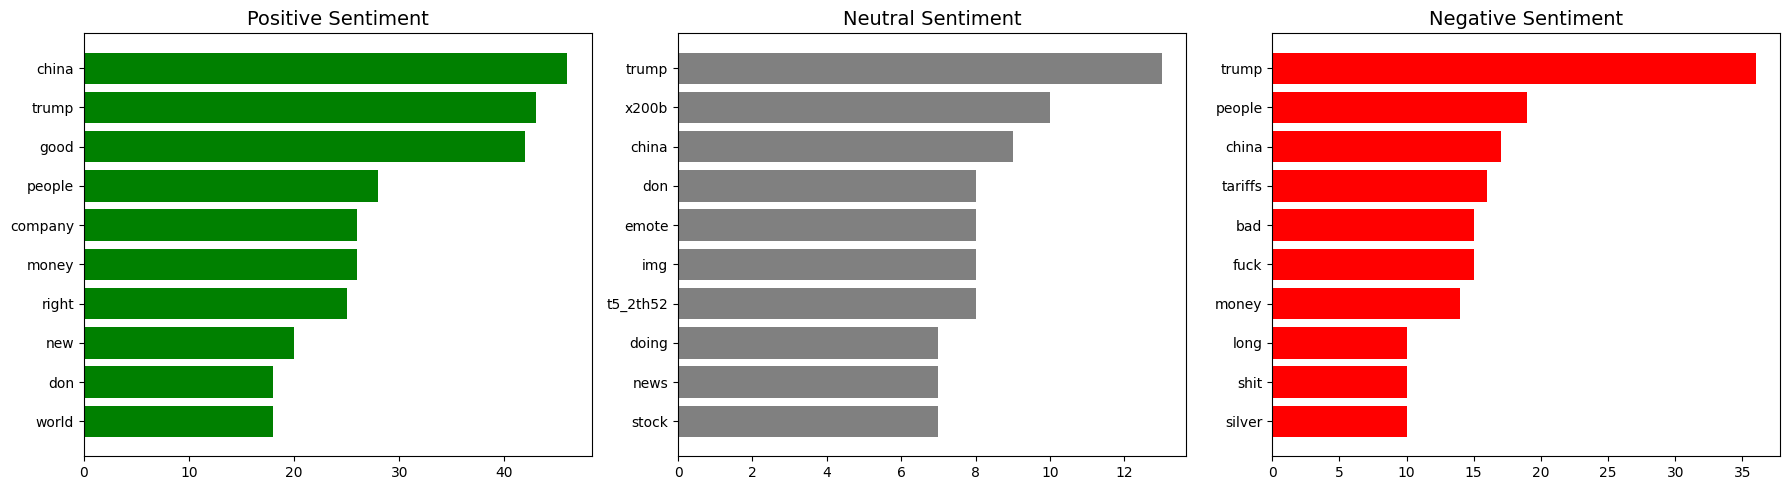

In [76]:
categories = ['positive', 'neutral', 'negative']
colors = ['green', 'grey', 'red']

count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X['text'])
feature_names = count_vect.get_feature_names_out()

exclude_words = {'like', 'just', 'going','think','make','time','day','com','market','want'}

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, (cat, col) in enumerate(zip(categories, colors)):
    mask = X['category_name'] == cat
    indices = np.where(mask)[0]
    X_sent = X_counts[indices]
    freqs = np.asarray(X_sent.sum(axis=0))[0]
    freq_dict = dict(zip(feature_names, freqs))
    freq_dict = {w: c for w, c in freq_dict.items() if w not in exclude_words}
    top = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:10]
    words, counts = zip(*top)
    
    axes[idx].barh(words[::-1], counts[::-1], color=col)
    axes[idx].set_title(f'{cat.capitalize()} Sentiment', fontsize=14)

plt.tight_layout()
plt.show()

# Phase 2

In [ ]:
### Begin Assignment Here